In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from nltk import DecisionTreeClassifier, accuracy, metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
#from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
#from sklearn.impute import  SimpleImputer
#"reade csv file "
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#to check for missing values
data.info()
#no NULL values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
#check for inconsistent data
#see if the features are correctly classified in python(binary,categorical and continous)
data.nunique()
#Feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN
#Also Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [4]:
#to see each unique category in feature 'ca'
data['ca'].unique()
#we need to change the value 4 to NaN thats why we need to find these rows and know how many rows are we going to change

array([0, 2, 1, 3, 4], dtype=int64)

In [5]:
data.ca.value_counts()
#5 rows have wrong ca value

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [6]:
data[data['ca']==4]
#to visualize the wrong ca values having value 4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [7]:
data.loc[data['ca']==4,'ca']=np.NaN
#check for unique values again
data['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [8]:
#same for Feature ‘thal’
#to see each unique category in feature 'thal'
data['thal'].unique()
#we need to change the value 0 to NaN thats why we need to find these rows and know how many rows are we going to change

array([1, 2, 3, 0], dtype=int64)

In [9]:
data.thal.value_counts()
#2 rows have wrong thal value

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [10]:
data[data['thal']==0]
#to visualize the wrong thal values having value 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [11]:
data.loc[data['thal']==0,'thal']=np.NaN #replace wrong data with NaN
#check for unique values again
data['thal'].unique()

array([ 1.,  2.,  3., nan])

In [12]:
#now its time to check for missing values agian previously we had no miising values but now we hanve 5 for ca and 2 for thal
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [13]:
#replace the nan with median(has better accuracy than removing thw whole row)
data = data.fillna(data.median())
#check agian
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#check for duplicate rows
duplicated = data.duplicated().sum()
if duplicated:
  print("Duplicated values = {} ".format(duplicated))
else:
  print("No duplicate values")

#to display duplicate row
data[data.duplicated()==True] 
#there is one duplicated row

Duplicated values = 1 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [15]:
#to keep THE FIRST duplicate row
data.drop_duplicates(subset=None, keep='first', inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0


For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


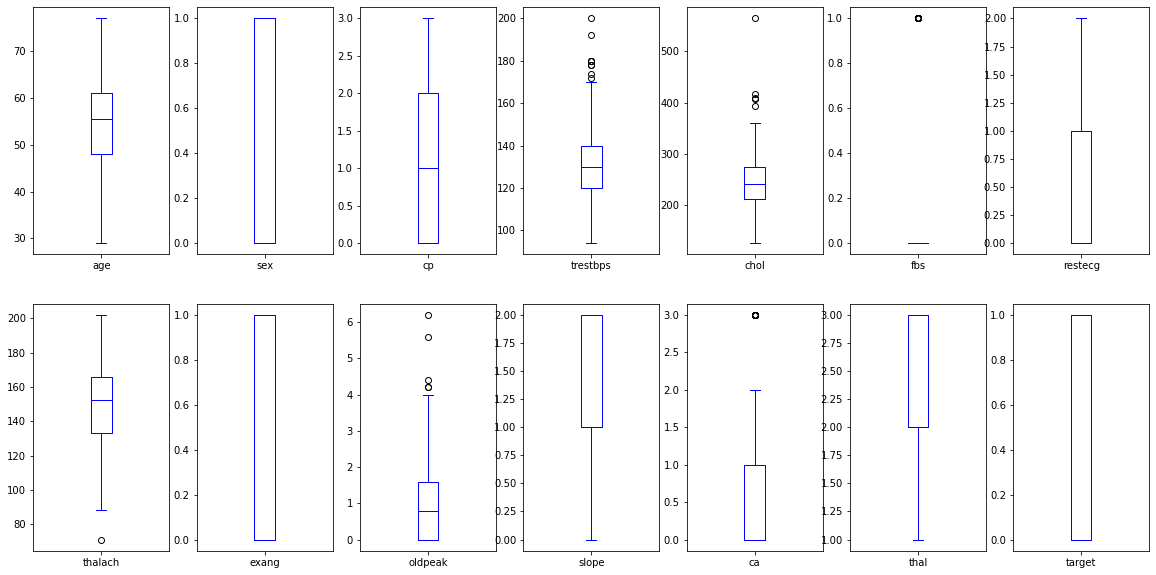

In [16]:
#check the outliers value in each feature

data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(data, drop = True):
    for each_feature in data.columns:
        feature_data = data[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if  drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if not drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(data[continous_features])

In [17]:

#figure that describe the outliers of features

#remove outliers and replace the NaN wwith median
for x in data:
    
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

data = data.fillna(data.median())
data

age
0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 302, dtype: int64
sex
0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 302, dtype: int64
cp
0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 302, dtype: int64
trestbps
0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 302, dtype: int64
chol
0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 302, dtype: int64
fbs
0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 302, dtype: int64
restecg
0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,0.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [18]:
#check agian for NULLS
data.isnull().sum()
#no NaN values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,train_size=0.80,test_size=0.20,random_state=0)

In [20]:


#KNN classifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,Y_train)
y_pred1 = knn.predict(X_test)
score_nb = round(accuracy_score(y_pred1,Y_test)*100,2)
clf_report = pd.DataFrame(classification_report(Y_test, y_pred1, output_dict=True))
print("The accuracy score achieved using KNN is: "+str(score_nb)+" %")
#print(clf_report)
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
clf_report = pd.DataFrame(classification_report(Y_test, Y_pred_nb, output_dict=True))
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
#print(clf_report)
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(302):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
    if (current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x




dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
clf_report = pd.DataFrame(classification_report(Y_test, Y_pred_dt, output_dict=True))
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
#print(clf_report)

from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(302):
    rf = RandomForestClassifier(random_state=x) 
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
    if (current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x



rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
clf_report = pd.DataFrame(classification_report(Y_test, Y_pred_rf, output_dict=True))
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using random  Forest classifier is: "+str(score_rf)+" %")
#print(clf_report)

The accuracy score achieved using KNN is: 67.21 %
The accuracy score achieved using Naive Bayes is: 88.52 %
The accuracy score achieved using Decision Tree is: 90.16 %
The accuracy score achieved using random  Forest classifier is: 91.8 %


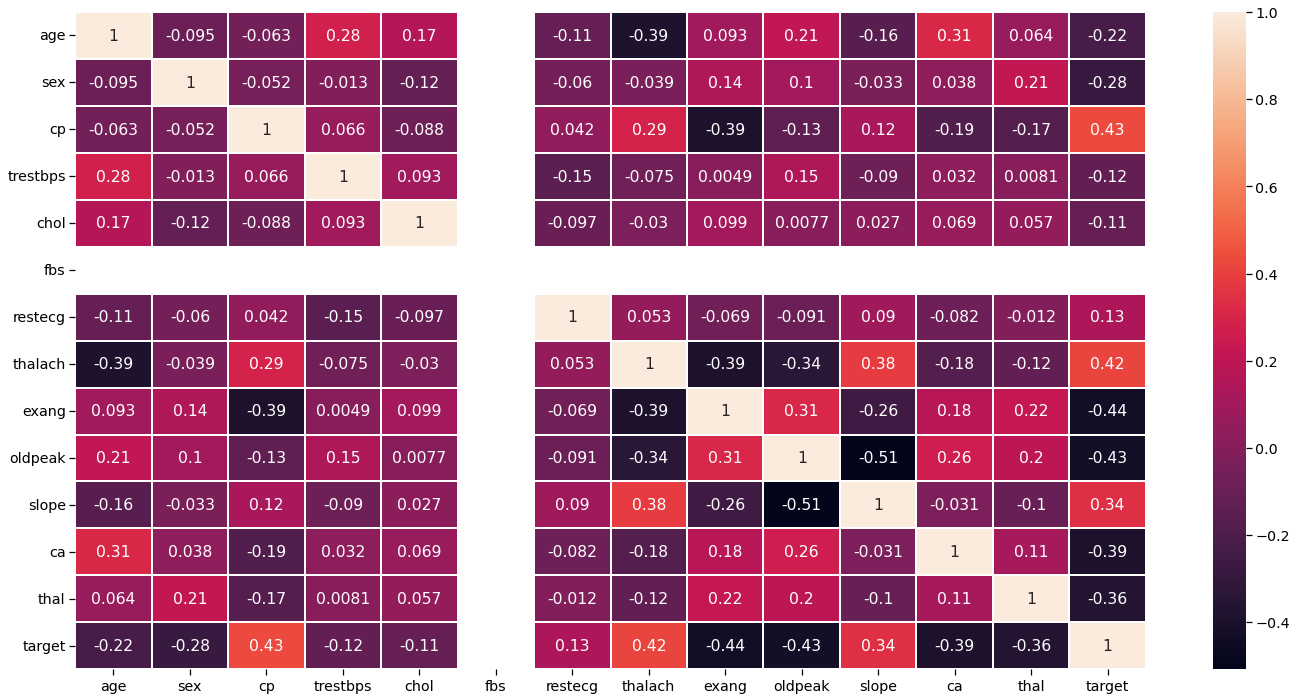

In [33]:

plt.figure(figsize=(20,10))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

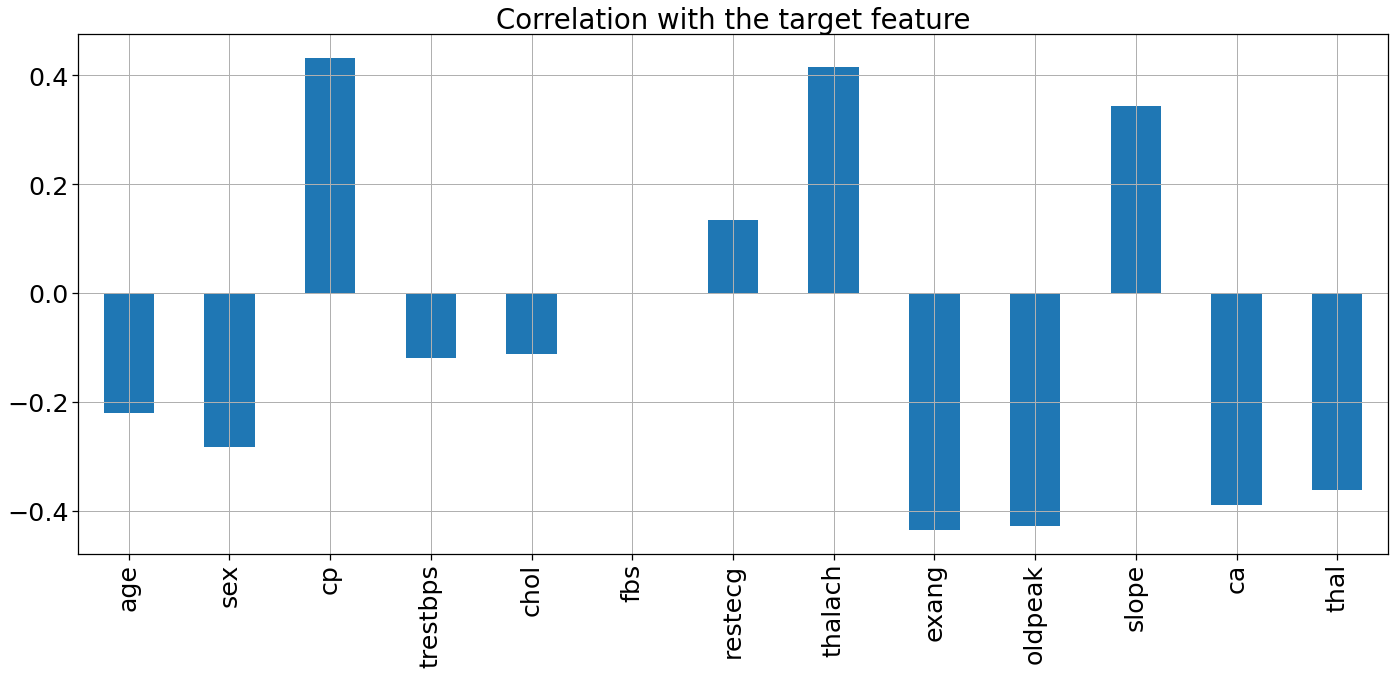

'fbs ,chol, trestbps, restecg has low correlation with our target'

In [22]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10),
title="Correlation with the target feature")
plt.tight_layout()
plt.show()
"Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature."
"oldpeak, exang, ca, thal, sex, age shows a good negative correlation with target"
"fbs ,chol, trestbps, restecg has low correlation with our target"

'we can see that elder people are the most affected by heart disease and young ones are the least affected.'

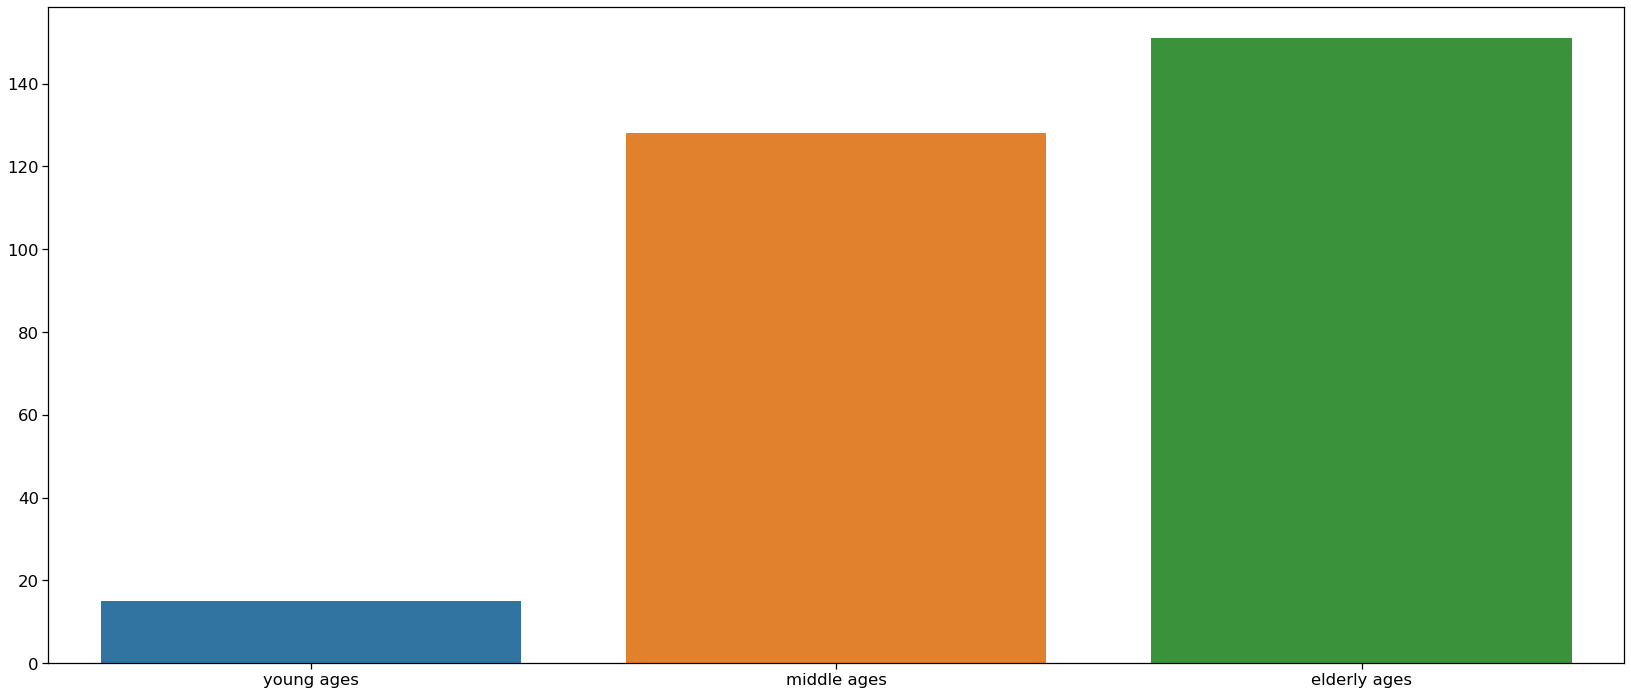

In [23]:
"Age Analysis"
" divide the Age feature into three parts  “Young”, “Middle” and “Elder”"
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

"we can see that elder people are the most affected by heart disease and young ones are the least affected."

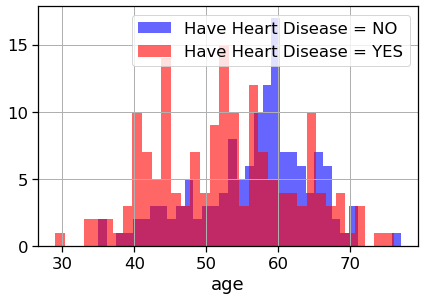

In [24]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(['age'], 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

'to prove above inference'

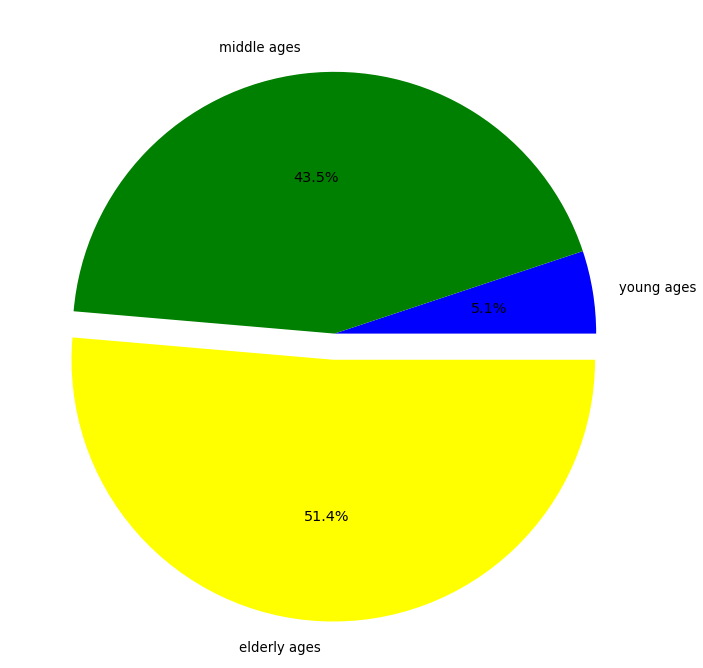

In [25]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()
"to prove above inference"

'Analysis sex vs target column '

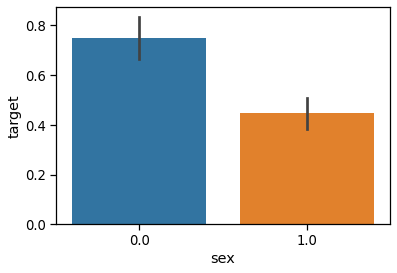

In [26]:
sns.barplot(data["sex"],data["target"])
"Analysis sex vs target column "

'Inference: As seen, there are 4 types of chest pain'

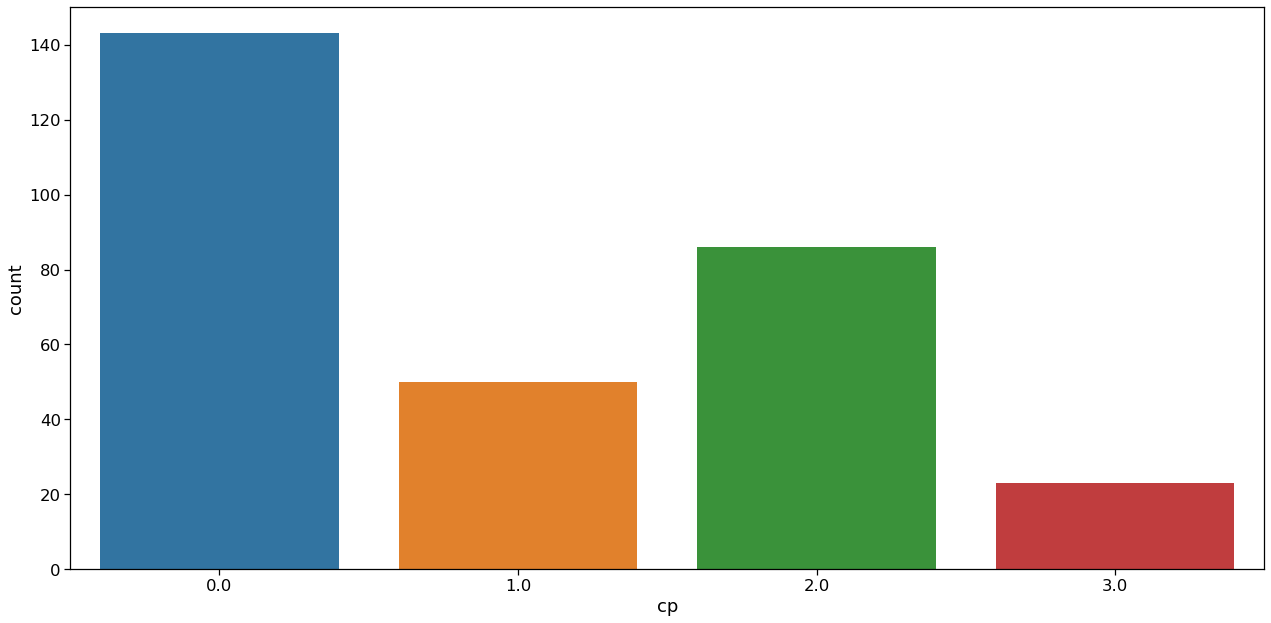

In [27]:
"Chest Pain Type(cp) Analysis"
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()
"Inference: As seen, there are 4 types of chest pain"

"We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems"

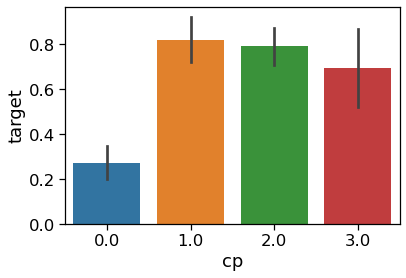

In [28]:
"Analyzing cp vs target column"
sns.barplot(data["cp"],data["target"])
"We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems"

'thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]'

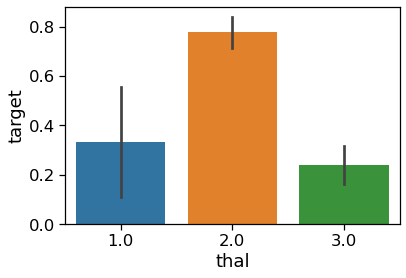

In [29]:
"Thal Analysis"
sns.barplot(data["thal"],data["target"])

"thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]"

"We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'"

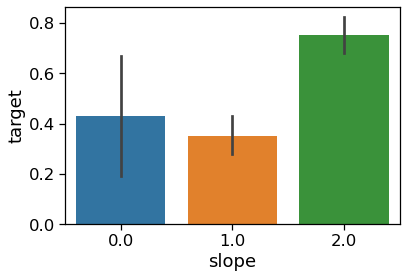

In [30]:
#"slope analysis with target"
sns.barplot(data["slope"],data["target"])
"We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'"


In [31]:
data.target.value_counts()

1.0    164
0.0    138
Name: target, dtype: int64

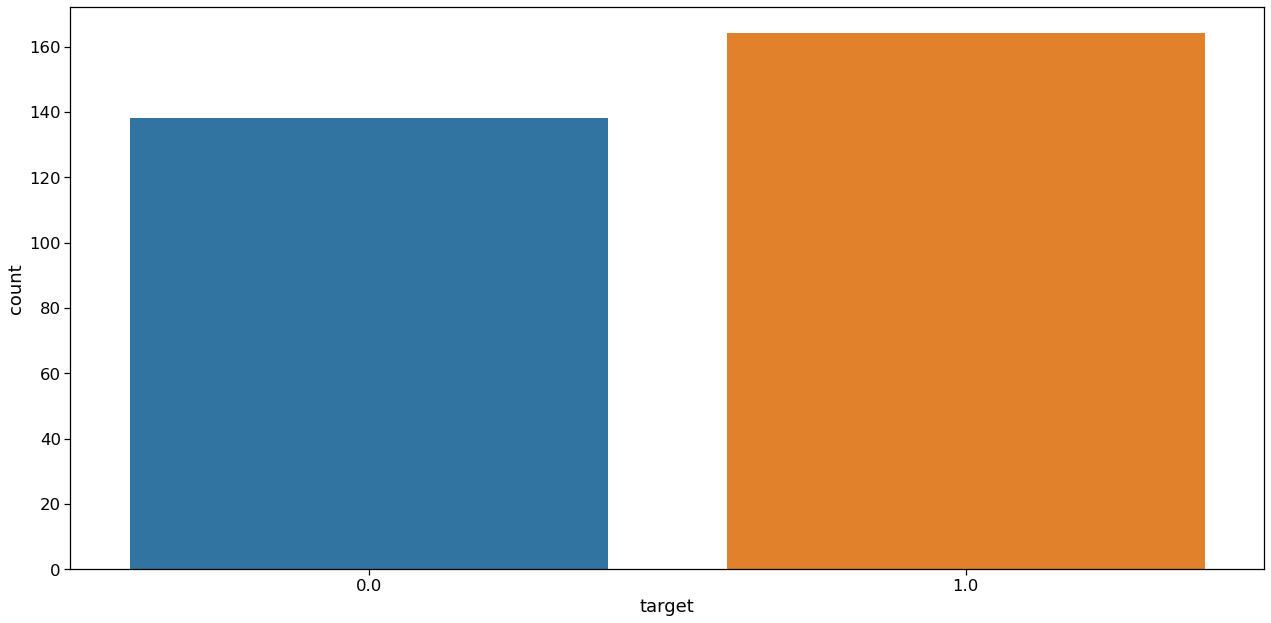

In [32]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()